In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [163]:
df = pd.read_csv('sample3.csv', sep=';')
df

,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,state,product_type,sub_area,...,build_count_brick,build_count_monolith,green_zone_part,indust_part,green_zone_km,industrial_km,water_treatment_km,water_km,education_raion,all_places_km
0,43.00,27.0,4.0,12.0,1.0,2.0,6.0,2.0,Investment,Bibirevo,...,0.0,2.0,0.189727,0.000070,0.600973,1.080934,23.683460,0.992631,3.0,1.670737
1,34.00,19.0,3.0,12.0,1.0,2.0,6.0,2.0,Investment,Nagatinskij Zaton,...,67.0,4.0,0.372602,0.049637,0.065321,0.966479,1.317476,0.698081,3.0,2.147168
2,43.00,29.0,2.0,12.0,1.0,2.0,6.0,2.0,Investment,Tekstil'shhiki,...,206.0,4.0,0.112560,0.118537,0.453172,0.939275,4.912660,0.468265,2.6,1.701709
3,89.00,50.0,9.0,12.0,1.0,2.0,6.0,2.0,Investment,Mitino,...,124.0,50.0,0.194703,0.069753,0.106125,0.451173,15.623710,1.200336,6.6,2.548313
4,77.00,77.0,4.0,12.0,1.0,2.0,6.0,2.0,Investment,Basmannoe,...,643.0,16.0,0.015234,0.037316,0.236214,0.392871,10.683540,0.820294,7.6,0.812994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38128,52.20,31.8,10.0,12.0,5.0,2.0,9.1,2.0,Investment,Kon'kovo,...,7.0,3.0,0.127002,0.135650,0.199909,0.624466,8.841655,0.219356,3.8,2.007465
38129,54.09,30.0,14.0,0.0,1.0,2.0,0.0,2.0,OwnerOccupier,Poselenie Desjonovskoe,...,68.0,6.0,0.349935,0.011654,0.991824,1.351922,9.211348,0.215268,0.2,6.116666
38130,41.08,1.0,12.0,1.0,1.0,1.0,1.0,1.0,OwnerOccupier,Tverskoe,...,529.0,25.0,0.065444,0.000078,0.189089,2.640803,10.378040,0.524839,10.4,0.715129
38131,34.80,19.8,8.0,9.0,5.0,1.0,6.4,2.0,Investment,Orehovo-Borisovo Juzhnoe,...,0.0,3.0,0.075790,0.100456,0.766444,0.521349,5.611768,1.394677,3.4,1.861863


## Delete outliers

In [164]:
df = df.reset_index().rename(columns={"index": "id"})
df.id += 1 
df

,id,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,state,product_type,...,build_count_brick,build_count_monolith,green_zone_part,indust_part,green_zone_km,industrial_km,water_treatment_km,water_km,education_raion,all_places_km
0,1,43.00,27.0,4.0,12.0,1.0,2.0,6.0,2.0,Investment,...,0.0,2.0,0.189727,0.000070,0.600973,1.080934,23.683460,0.992631,3.0,1.670737
1,2,34.00,19.0,3.0,12.0,1.0,2.0,6.0,2.0,Investment,...,67.0,4.0,0.372602,0.049637,0.065321,0.966479,1.317476,0.698081,3.0,2.147168
2,3,43.00,29.0,2.0,12.0,1.0,2.0,6.0,2.0,Investment,...,206.0,4.0,0.112560,0.118537,0.453172,0.939275,4.912660,0.468265,2.6,1.701709
3,4,89.00,50.0,9.0,12.0,1.0,2.0,6.0,2.0,Investment,...,124.0,50.0,0.194703,0.069753,0.106125,0.451173,15.623710,1.200336,6.6,2.548313
4,5,77.00,77.0,4.0,12.0,1.0,2.0,6.0,2.0,Investment,...,643.0,16.0,0.015234,0.037316,0.236214,0.392871,10.683540,0.820294,7.6,0.812994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38128,38129,52.20,31.8,10.0,12.0,5.0,2.0,9.1,2.0,Investment,...,7.0,3.0,0.127002,0.135650,0.199909,0.624466,8.841655,0.219356,3.8,2.007465
38129,38130,54.09,30.0,14.0,0.0,1.0,2.0,0.0,2.0,OwnerOccupier,...,68.0,6.0,0.349935,0.011654,0.991824,1.351922,9.211348,0.215268,0.2,6.116666
38130,38131,41.08,1.0,12.0,1.0,1.0,1.0,1.0,1.0,OwnerOccupier,...,529.0,25.0,0.065444,0.000078,0.189089,2.640803,10.378040,0.524839,10.4,0.715129
38131,38132,34.80,19.8,8.0,9.0,5.0,1.0,6.4,2.0,Investment,...,0.0,3.0,0.075790,0.100456,0.766444,0.521349,5.611768,1.394677,3.4,1.861863


In [165]:
train_pos = 30471

In [166]:
train = df[:train_pos].copy()
train

,id,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,state,product_type,...,build_count_brick,build_count_monolith,green_zone_part,indust_part,green_zone_km,industrial_km,water_treatment_km,water_km,education_raion,all_places_km
0,1,43.0,27.0,4.0,12.0,1.0,2.0,6.0,2.0,Investment,...,0.0,2.0,0.189727,0.000070,0.600973,1.080934,23.683460,0.992631,3.0,1.670737
1,2,34.0,19.0,3.0,12.0,1.0,2.0,6.0,2.0,Investment,...,67.0,4.0,0.372602,0.049637,0.065321,0.966479,1.317476,0.698081,3.0,2.147168
2,3,43.0,29.0,2.0,12.0,1.0,2.0,6.0,2.0,Investment,...,206.0,4.0,0.112560,0.118537,0.453172,0.939275,4.912660,0.468265,2.6,1.701709
3,4,89.0,50.0,9.0,12.0,1.0,2.0,6.0,2.0,Investment,...,124.0,50.0,0.194703,0.069753,0.106125,0.451173,15.623710,1.200336,6.6,2.548313
4,5,77.0,77.0,4.0,12.0,1.0,2.0,6.0,2.0,Investment,...,643.0,16.0,0.015234,0.037316,0.236214,0.392871,10.683540,0.820294,7.6,0.812994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30467,44.0,27.0,7.0,9.0,1.0,2.0,6.0,3.0,Investment,...,20.0,5.0,0.096270,0.300323,0.139814,0.702853,22.746320,0.979218,3.4,1.010217
30467,30468,86.0,59.0,3.0,9.0,2.0,4.0,10.0,3.0,Investment,...,529.0,25.0,0.065444,0.000078,0.271861,0.473020,13.867820,1.063533,10.4,0.586752
30468,30469,45.0,30.0,10.0,20.0,1.0,1.0,1.0,1.0,OwnerOccupier,...,68.0,6.0,0.496315,0.007122,0.427248,0.353642,16.784630,0.394422,0.0,4.358477
30469,30470,64.0,32.0,5.0,15.0,1.0,2.0,11.0,2.0,Investment,...,4.0,9.0,0.167526,0.093443,0.227547,2.397723,11.397520,0.738539,4.2,2.611044


In [167]:
test = df[train_pos:].copy()
test

,id,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,state,product_type,...,build_count_brick,build_count_monolith,green_zone_part,indust_part,green_zone_km,industrial_km,water_treatment_km,water_km,education_raion,all_places_km
30471,30472,39.00,20.7,2.0,9.0,1.0,1.0,8.9,3.0,Investment,...,245.0,116.0,0.137846,0.041116,0.061485,1.205404,0.967696,0.248151,6.2,3.905762
30472,30473,79.20,30.0,8.0,17.0,1.0,3.0,1.0,1.0,OwnerOccupier,...,68.0,6.0,0.496315,0.007122,0.000000,0.742377,16.049420,0.799853,0.0,5.042626
30473,30474,40.50,25.1,3.0,5.0,2.0,2.0,4.8,2.0,Investment,...,254.0,3.0,0.065409,0.225825,0.580638,0.900408,11.749900,1.384824,4.0,1.635152
30474,30475,62.80,36.0,17.0,17.0,1.0,2.0,62.8,3.0,OwnerOccupier,...,68.0,6.0,0.262459,0.017647,0.025446,0.466738,5.061917,0.233017,0.4,5.819101
30475,30476,40.00,40.0,17.0,17.0,1.0,1.0,1.0,1.0,OwnerOccupier,...,68.0,6.0,0.496315,0.007122,0.427248,0.353642,16.784630,0.394422,0.0,4.358477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38128,38129,52.20,31.8,10.0,12.0,5.0,2.0,9.1,2.0,Investment,...,7.0,3.0,0.127002,0.135650,0.199909,0.624466,8.841655,0.219356,3.8,2.007465
38129,38130,54.09,30.0,14.0,0.0,1.0,2.0,0.0,2.0,OwnerOccupier,...,68.0,6.0,0.349935,0.011654,0.991824,1.351922,9.211348,0.215268,0.2,6.116666
38130,38131,41.08,1.0,12.0,1.0,1.0,1.0,1.0,1.0,OwnerOccupier,...,529.0,25.0,0.065444,0.000078,0.189089,2.640803,10.378040,0.524839,10.4,0.715129
38131,38132,34.80,19.8,8.0,9.0,5.0,1.0,6.4,2.0,Investment,...,0.0,3.0,0.075790,0.100456,0.766444,0.521349,5.611768,1.394677,3.4,1.861863


## Delete outliers, explore normality 

source: https://proglib.io/p/moem-dataset-rukovodstvo-po-ochistke-dannyh-v-python-2020-03-27

source: https://www.theanalysisfactor.com/anatomy-of-a-normal-probability-plot/

source: https://proglib.io/p/postroenie-i-otbor-priznakov-chast-1-feature-engineering-2021-09-15

In [168]:
def delete_outliers(df, col):
    upper_lim = df[col].quantile(.95)
    lower_lim = df[col].quantile(.05)
    df.loc[(df[col] > upper_lim),col] = upper_lim
    df.loc[(df[col] < lower_lim),col] = lower_lim

In [169]:
numeric_col = train.columns[train.dtypes != 'object'][1:]
numeric_col

Index(['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'num_room',
       'kitch_sq', 'state', 'healthcare_centers_raion',
       'shopping_centers_raion', 'office_raion', 'cemetery_km', 'big_road1_km',
       'big_road2_km', 'big_market_km', 'price_doc', 'ekder_all', 'young_all',
       'children_school', 'cafe_count_500_price_1000', 'cafe_avg_price_1000',
       'cafe_avg_price_1500', 'cafe_avg_price_2000', 'cafe_avg_price_5000',
       'railroad_station_avto_min', 'public_transport_station_min_walk',
       'build_count_block', 'build_count_brick', 'build_count_monolith',
       'green_zone_part', 'indust_part', 'green_zone_km', 'industrial_km',
       'water_treatment_km', 'water_km', 'education_raion', 'all_places_km'],
      dtype='object')

In [170]:
for col in numeric_col:
    delete_outliers(train, col)

In [171]:
train.shape

(30471, 43)

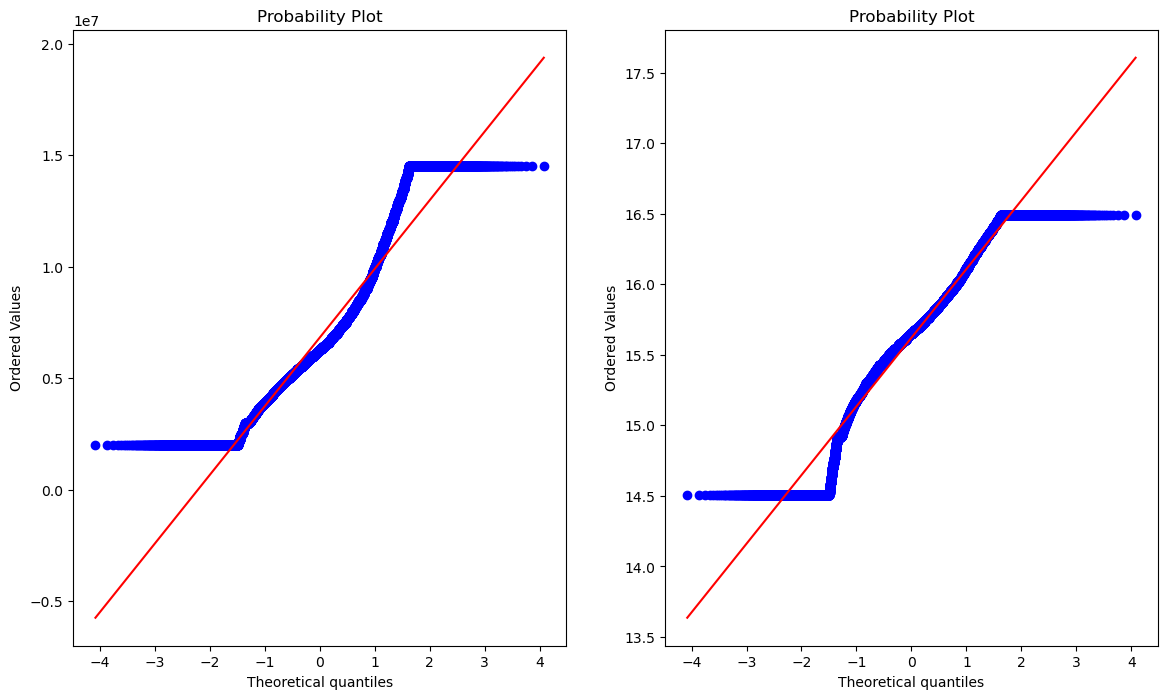

In [172]:
fig = plt.figure(figsize = (14,8))

fig.add_subplot(1,2,1)
res = stats.probplot(train['price_doc'], plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(np.log1p(train['price_doc']), plot=plt)

In [173]:
train['price_doc'] = np.log1p(train['price_doc'])
test['price_doc'] = np.log1p(test['price_doc'])

find max correlation with target

<AxesSubplot:>

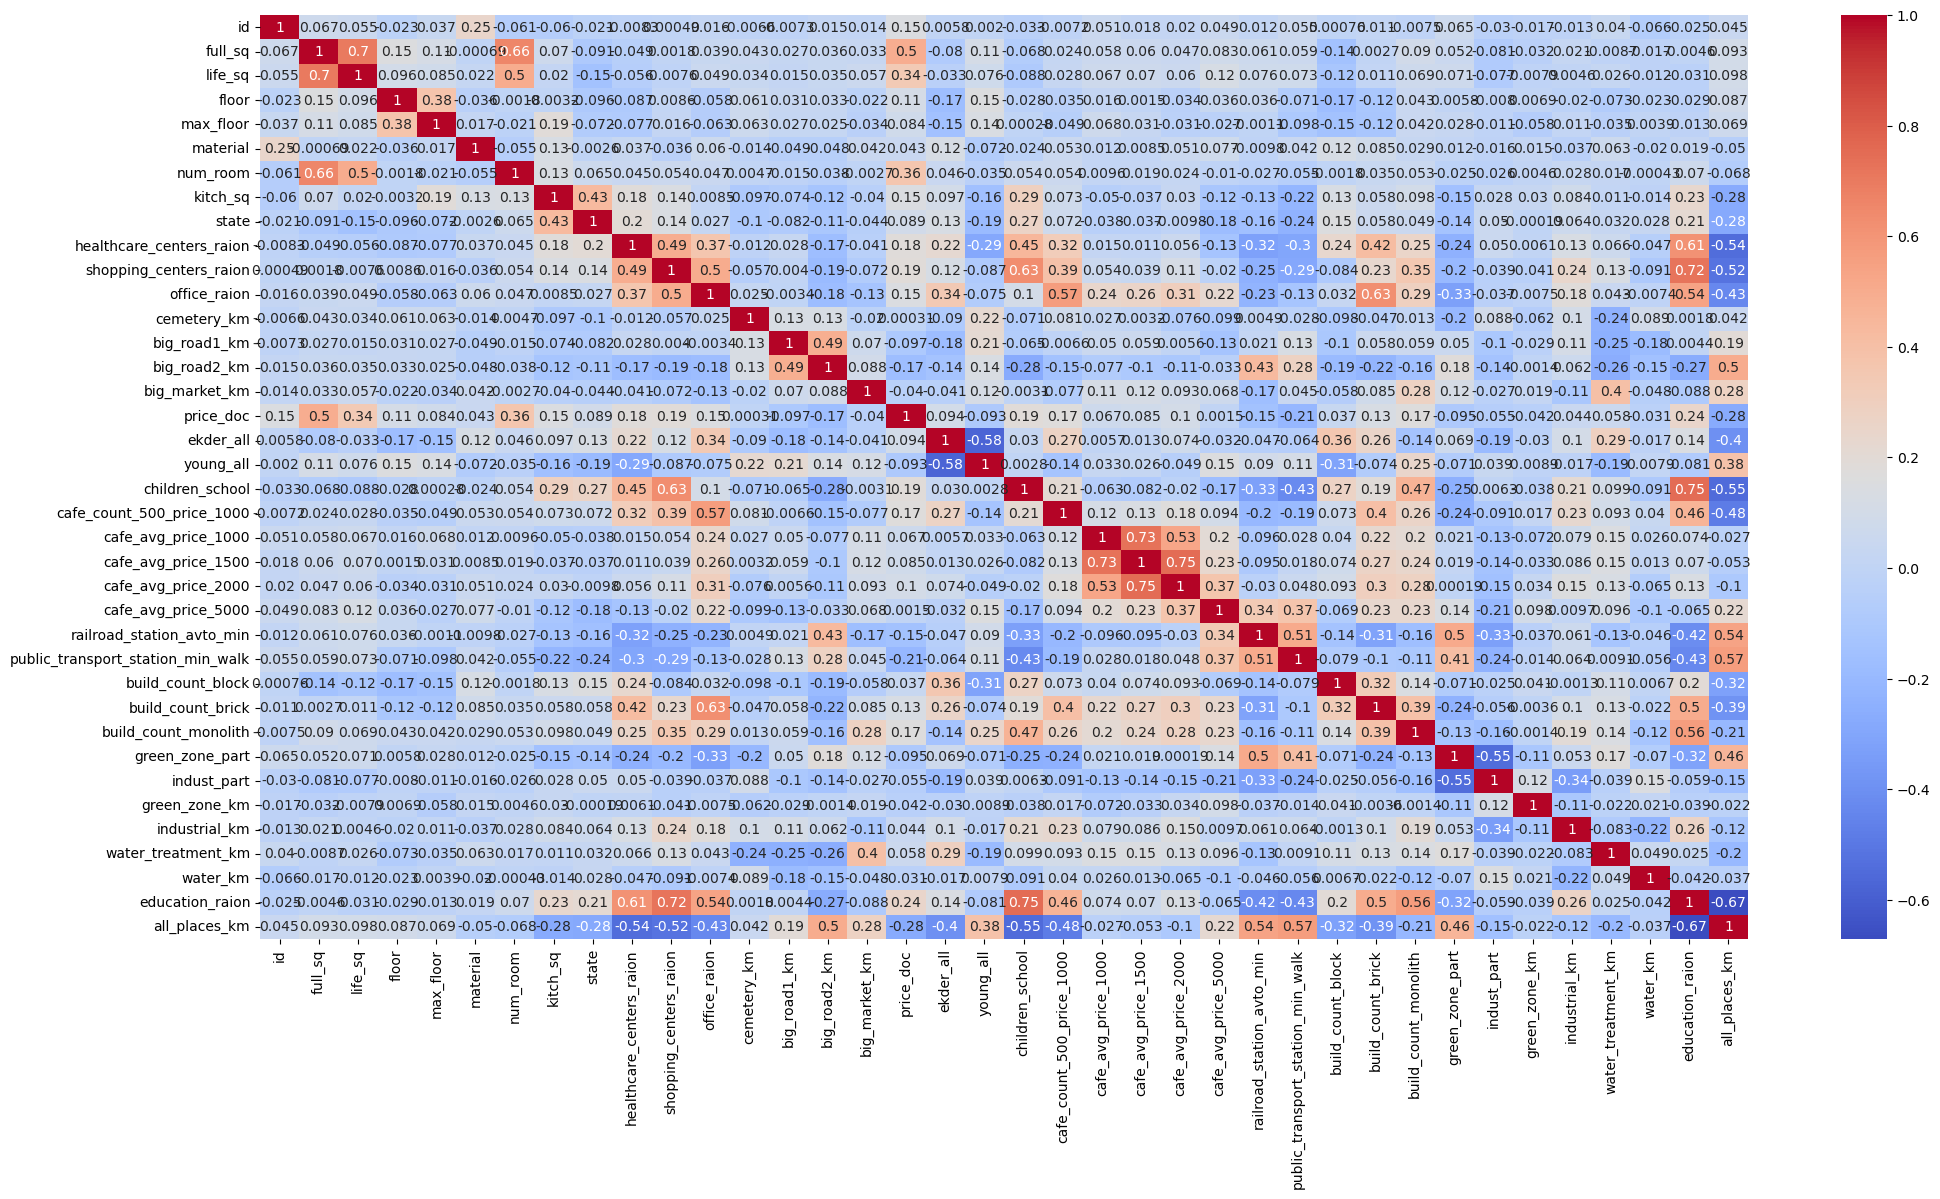

In [174]:
f, ax = plt.subplots(figsize=(24, 12))

corr_matrix = train.corr()
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')

In [175]:
train.drop('id', axis=1, inplace=True)

In [176]:
train

,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,state,product_type,sub_area,...,build_count_brick,build_count_monolith,green_zone_part,indust_part,green_zone_km,industrial_km,water_treatment_km,water_km,education_raion,all_places_km
0,43.0,27.0,4.0,12.0,1.0,2.0,6.0,2.0,Investment,Bibirevo,...,0.0,2.0,0.189727,0.000070,0.600973,1.080934,22.146930,0.992631,3.0,1.670737
1,34.0,19.0,3.0,12.0,1.0,2.0,6.0,2.0,Investment,Nagatinskij Zaton,...,67.0,4.0,0.372602,0.049637,0.065321,0.966479,1.317476,0.698081,3.0,2.147168
2,43.0,29.0,2.0,12.0,1.0,2.0,6.0,2.0,Investment,Tekstil'shhiki,...,206.0,4.0,0.112560,0.118537,0.453172,0.939275,4.912660,0.468265,2.6,1.701709
3,89.0,50.0,9.0,12.0,1.0,2.0,6.0,2.0,Investment,Mitino,...,124.0,49.0,0.194703,0.069753,0.106125,0.451173,15.623710,1.200336,6.6,2.548313
4,77.0,64.0,4.0,12.0,1.0,2.0,6.0,2.0,Investment,Basmannoe,...,301.0,16.0,0.027651,0.037316,0.236214,0.392871,10.683540,0.820294,7.2,1.013616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44.0,27.0,7.0,9.0,1.0,2.0,6.0,3.0,Investment,Otradnoe,...,20.0,5.0,0.096270,0.300323,0.139814,0.702853,22.146930,0.979218,3.4,1.013616
30467,86.0,59.0,3.0,9.0,2.0,3.0,10.0,3.0,Investment,Tverskoe,...,301.0,25.0,0.065444,0.000078,0.271861,0.473020,13.867820,1.063533,7.2,1.013616
30468,45.0,30.0,10.0,20.0,1.0,1.0,1.0,1.0,OwnerOccupier,Poselenie Vnukovskoe,...,68.0,6.0,0.496315,0.007122,0.427248,0.353642,16.784630,0.394422,0.0,4.358477
30469,64.0,32.0,5.0,15.0,1.0,2.0,11.0,2.0,Investment,Obruchevskoe,...,4.0,9.0,0.167526,0.093443,0.227547,2.049956,11.397520,0.738539,4.2,2.611044


## Convert categorical values to numeric

Don't change count of rows => use all data

In [177]:
df.drop('id', axis=1, inplace=True)

In [178]:
category_col = df.columns[df.dtypes == 'object']
category_col

Index(['product_type', 'sub_area', 'radiation_raion',
       'detention_facility_raion', 'ecology'],
      dtype='object')

In [179]:
encoded_columns = pd.get_dummies(df[category_col])

In [180]:
df = df.join(encoded_columns).drop(columns=category_col, axis=1)

## Standartize data

In [181]:
from sklearn.preprocessing import StandardScaler

In [182]:
df['price_doc'] = np.log1p(df['price_doc']) 

In [183]:
train = df[:train_pos].copy()
test = df[train_pos:].copy()

In [184]:
y_train = train['price_doc'].copy()
x_train = train.drop('price_doc', axis=1)

In [185]:
y_test = test['price_doc'].copy()
x_test = test.drop('price_doc', axis=1)

In [186]:
scaler = StandardScaler()

In [187]:
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)

In [188]:
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)

## Linear regression

In [189]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [190]:
reg = LinearRegression()

In [191]:
reg.fit(x_train, y_train)

LinearRegression()

In [192]:
y_pred = reg.predict(x_test)

In [193]:
mse = mean_squared_error(y_test, y_pred)

In [194]:
print('Mean Squared Error:', mse)

Mean Squared Error: 6.560224452334768e+24


In [195]:
score = reg.score(x_test, y_test)

In [196]:
print('Score:', score)

Score: -2.3100201290650213e+53


## Random rainforest

In [197]:
from sklearn.ensemble import RandomForestRegressor

In [198]:
forest = RandomForestRegressor()

In [199]:
forest.fit(x_train, y_train)

RandomForestRegressor()

In [200]:
forest.score(x_test, y_test)

-1.1465944819082518e+28